In [103]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from pdb import set_trace as keyboard
from IPython import display
import time

### Cos of a VA

In [57]:
N = int(1e3)
y = np.zeros(N)
t_array = np.linspace(0, N-1, N)
#steps = np.random.choice([-1, 1], int(1e6))

In [80]:
var = .1
mi = .15 * np.pi

In [81]:
omega = .1*np.pi
y = np.cos(omega * np.random.normal(mi, np.sqrt(var), N))

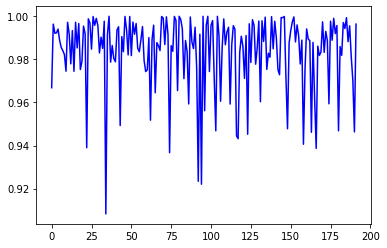

KeyboardInterrupt: 

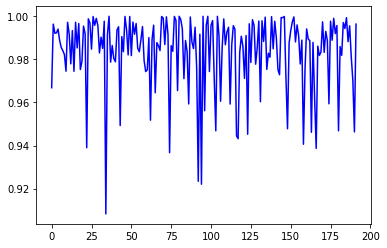

In [82]:
fig, ax = plt.subplots()

for t in range(1, N):
    if t % 1 == 0:
        if True:
            plt.cla()
            ax.plot(y[:t+1], 'b')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.1)

### Random Walk

In [116]:
N = int(1e3)
y = np.zeros(N)
t_array = np.linspace(0, N-1, N)
n_processes = 10
#steps = np.random.choice([-1, 1], int(1e6))

In [117]:
var = .001
mi = 0 * 1e-2
yInicial = 10

In [118]:
dic_params = {}
dic_params['steps'] = {}
dic_params['rw'] = {}

for i in range(n_processes):
    dic_params['steps'][i] = np.random.normal(mi, np.sqrt(var), N)
    dic_params['steps'][i][0] = yInicial
    dic_params['rw'][i]    = np.cumsum(dic_params['steps'][i])

KeyboardInterrupt: 

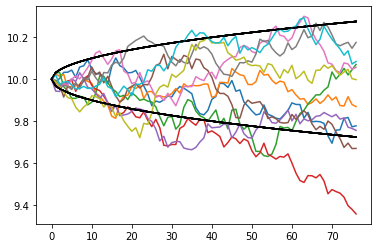

In [122]:
fig, ax = plt.subplots()

for t in range(1, N):
    plt.cla()
    for i in range(n_processes):
        ax.plot(dic_params['rw'][i][:t+1])
        ax.plot(np.sqrt(var*t_array[:t+1]) + yInicial, 'k')
        ax.plot(-np.sqrt(var*t_array[:t+1]) + yInicial, 'k')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

### Random Walk - Log Normal

In [24]:
for i in range(100):

	if i % 100 == 0:
		print(i)

	steps = np.random.normal(mi, np.sqrt(var), N)
	steps[0] = 0.

	sum_steps = np.zeros(len(steps))
	for i in range(1, N):		
		sum_steps[i] = np.sum(steps[:i+1])

	yInicial = 10

	y[0] = yInicial
	for t in range(1, N):	
		y[t] = y[0]*np.exp(sum_steps[t])
		#y[t] = y[0]*np.exp(np.sum(steps[:t+1]))

	values.append(y[-1])

0


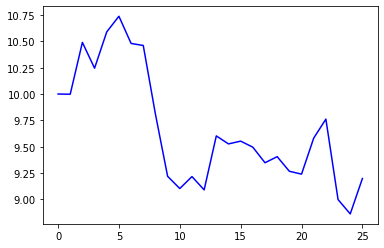

KeyboardInterrupt: 

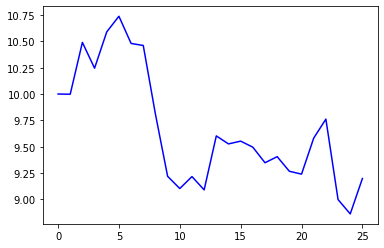

In [38]:
fig, ax = plt.subplots()

for t in range(1, N):
    #y[t] = y[t-1] + steps[t]
    y[t] = y[0]*np.exp(sum_steps[t])
    #y[t] = y[0]*np.sum(steps[:t+1])
    if t % 1 == 0:
        if True:
            print('')
            plt.cla()
            ax.plot(y[:t+1], 'b')
            #ax.plot(np.log(y[:t+1]), 'b')
            #ax.plot(np.sqrt(var*t_array[:t+1]) + y[0], 'k')
            #ax.plot(-np.sqrt(var*t_array[:t+1]) + y[0], 'k')
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(0.1)